# Linear Regression Example

In [1]:
# import sys
# sys.path.append('../../pyLearnAlgorithms')
from scipy.io import loadmat
import os
from pyLearnAlgorithms.graph_view import GraphView
from pyLearnAlgorithms.linear_regression import LinearRegression

In [2]:
dr = '../datasets'
fl = 'WaterLevel.mat'
mat_path = os.path.join(dr, fl)
data = loadmat(mat_path)
X, y = data['X'], data['y'][:, 0]
Xtest, ytest = data['Xtest'], data['ytest'][:, 0]
Xval, yval = data['Xval'], data['yval'][:, 0]

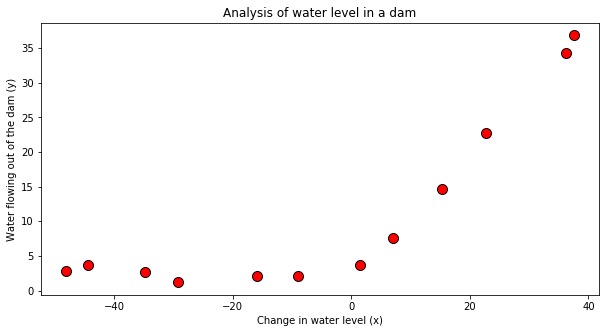

In [3]:
dataset_graph = GraphView(X, y)
dataset_graph.view_data(xlabel = 'Change in water level (x)',
                        ylabel = 'Water flowing out of the dam (y)', 
                        title = 'Analysis of water level in a dam')

In [4]:
regressor = LinearRegression(X, y)
optimize_values = regressor.train_linear_reg()
print('Cost Function:', optimize_values.fun)
print('Theta parameters:', optimize_values.x)

Cost Function: 22.373906495108915
Theta parameters: [13.08790351  0.36777923]


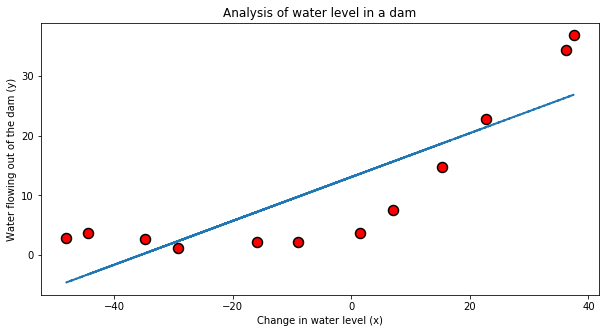

In [5]:
dataset_graph.model_linear(xlabel = 'Change in water level (x)',
                           ylabel = 'Water flowing out of the dam (y)', 
                           title = 'Analysis of water level in a dam')

In [6]:
train_error, val_error = regressor.learning_curve(Xval, yval)
print('Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

Training Examples	Training Error		Cross Validation Error
1			1.0176953929799205e-18	205.1210957127572
2			3.466571458294657e-09	110.30264057845221
3			3.2865950455012833	45.010231320931936
4			2.8426776893998307	48.36891082876348
5			13.154048809114924	35.86516473228544
6			19.443962512495464	33.829961665848444
7			20.098521655088877	31.97098567215687
8			18.172858695200024	30.862446202285934
9			22.609405424954733	31.13599809769148
10			23.261461592611813	28.93620747049214
11			24.31724958804416	29.55143162171058
12			22.373906495108915	29.43381813215488


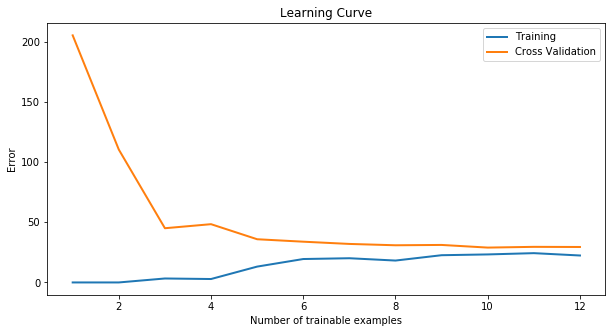

In [7]:
dataset_graph.learning_curve(train_error, val_error)

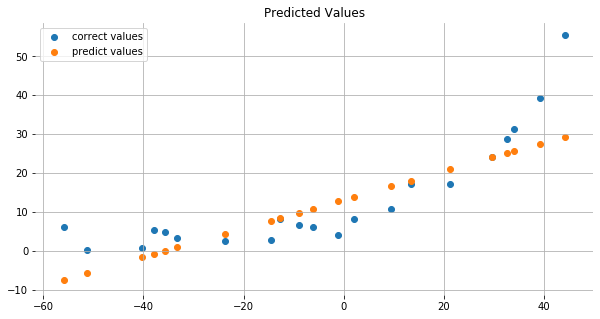

In [8]:
pred = regressor.predict(Xtest)
dataset_graph.predicted_values(Xtest, ytest, pred)

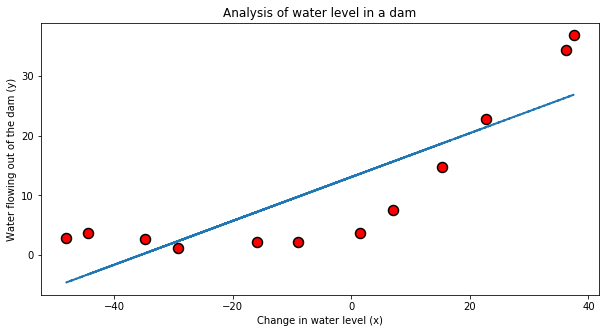

In [9]:
dataset_graph.model_linear_normal_equation(xlabel = 'Change in water level (x)',
                                           ylabel = 'Water flowing out of the dam (y)', 
                                           title = 'Analysis of water level in a dam')

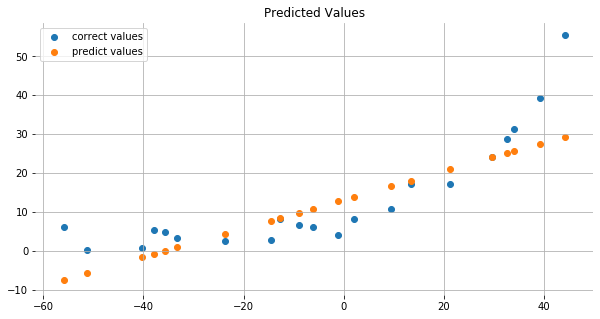

In [10]:
pred_NE = regressor.predict_normal_equation(Xtest)
dataset_graph.predicted_values(Xtest, ytest, pred_NE)